In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from rtm_1d import rtm

In [34]:
from wave_1d_fd_pml import test_wave_1d_fd_pml

## Make the model
A simple layer over a halfspace model. I set the source position to be at the top of the model, to be similar to regular seismic experiments. I also create a migration velocity model, which is the same size as the true model, but is constant velocity.

In [35]:
model=test_wave_1d_fd_pml.model_one(N=500)
model['sx']=[1]
migmodel = np.ones_like(model['model'])*model['model'][0]

## Create the RTM object
This contains functions for modeling and migration.

In [36]:
r=rtm.Rtm(5, 0.001)

## Make synthetic data
I use the true model to create synthetic receiver data. There is only one receiver, and it is at the same location as the source. I mute the first 200 samples as these contain the direct wave. The result it plotted below (time on x axis, receiver amplitude on y axis).

In [37]:
d=r.model_shot(model['model'], model['sources'][0], model['sx'][0], model['sx'], 2)
d[0, :200] = 0

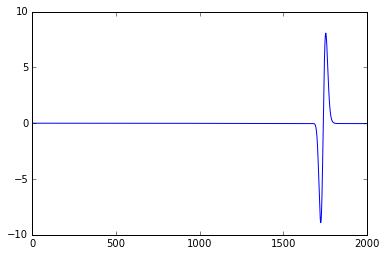

In [38]:
plt.plot(d.reshape(-1))

## Migration
I use the constant velocity migration velocity model for migration, which will try to make an image of the reflector using the recorded receiver data. The result is plotted below, with the true model overlaid (and scaled vertically so that it can be plotted on the same graph). The result shows that the migration accurately located the reflector.

In [39]:
i=r.migrate_shot(migmodel, model['sources'][0], model['sx'][0], d, model['sx'], 1)

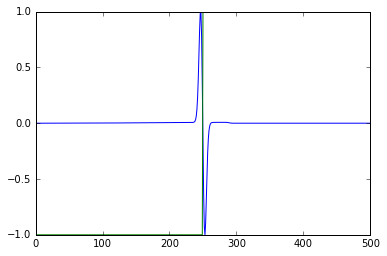

In [40]:
plt.plot(i/np.max(np.abs(i)))
plt.plot((model['model'] - np.mean(model['model']))/np.std(model['model']))